In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from termcolor import colored
from utils import *

## Data Cleaning

In [2]:
df = pd.read_csv('./googleplaystore.csv')
print(len(df))
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df.head()

10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
orig_len = len(df)
df = df[df['Rating'].notna()]
reduced_rating = len(df)
print('length of dataset after reducing ratings:', orig_len, '------', reduced_rating)
df = df[df['Price'].notna()]
reduced_price = len(df)
print('length of dataset after reducing prices:', reduced_rating, '------', reduced_price)
df = df[df['Category'].notna()]
Category = len(df)
print('length of dataset after reducing Category:', reduced_price, '------', Category)
df = df[df['Genres'].notna()]
Genres = len(df)
print('length of dataset after reducing Genres:', Category, '------', Genres)
df = df[df['Content Rating'].notna()]
Content_Rating = len(df)
print('length of dataset after reducing Content Rating:', Genres, '------', Content_Rating)
df = df[df['Size'].notna()]
Size = len(df)
print('length of dataset after reducing Size:', Content_Rating, '------', Size)
df = df[df['Type'].notna()]
Type = len(df)
print('length of dataset after reducing Type:', Size, '------', Type)

length of dataset after reducing ratings: 9360 ------ 9360
length of dataset after reducing prices: 9360 ------ 9360
length of dataset after reducing Category: 9360 ------ 9360
length of dataset after reducing Genres: 9360 ------ 9360
length of dataset after reducing Content Rating: 9360 ------ 9360
length of dataset after reducing Size: 9360 ------ 9360
length of dataset after reducing Type: 9360 ------ 9360


In [4]:
for column in df.columns:
    print( column, '-------', type(df[column][0]), '-------', df[column][0])

App ------- <class 'str'> ------- Photo Editor & Candy Camera & Grid & ScrapBook
Category ------- <class 'str'> ------- ART_AND_DESIGN
Rating ------- <class 'numpy.float64'> ------- 4.1
Reviews ------- <class 'str'> ------- 159
Size ------- <class 'str'> ------- 19M
Installs ------- <class 'str'> ------- 10,000+
Type ------- <class 'str'> ------- Free
Price ------- <class 'str'> ------- 0
Content Rating ------- <class 'str'> ------- Everyone
Genres ------- <class 'str'> ------- Art & Design
Last Updated ------- <class 'str'> ------- January 7, 2018
Current Ver ------- <class 'str'> ------- 1.0.0
Android Ver ------- <class 'str'> ------- 4.0.3 and up


In [5]:
for col in df.columns:
    a = df[col]
    s = []
    for i in a:
        if type(i) not in s:
            s.append(type(i))
    print(col, '-----', len(s), '------>', s)

App ----- 1 ------> [<class 'str'>]
Category ----- 1 ------> [<class 'str'>]
Rating ----- 1 ------> [<class 'float'>]
Reviews ----- 1 ------> [<class 'str'>]
Size ----- 1 ------> [<class 'str'>]
Installs ----- 1 ------> [<class 'str'>]
Type ----- 1 ------> [<class 'str'>]
Price ----- 1 ------> [<class 'str'>]
Content Rating ----- 1 ------> [<class 'str'>]
Genres ----- 1 ------> [<class 'str'>]
Last Updated ----- 1 ------> [<class 'str'>]
Current Ver ----- 1 ------> [<class 'str'>]
Android Ver ----- 1 ------> [<class 'str'>]


In [6]:
df['Type'] = df['Type'].astype(str)
df['Content Rating'] = df['Content Rating'].astype(str)
df['Current Ver'] = df['Current Ver'].astype(str)
df['Android Ver'] = df['Android Ver'].astype(str)

In [7]:
for column in df.columns:
    print ("number of unique values in column {}:".format(column), len(np.unique(np.array(df[column]))))

number of unique values in column App: 8190
number of unique values in column Category: 33
number of unique values in column Rating: 39
number of unique values in column Reviews: 5990
number of unique values in column Size: 413
number of unique values in column Installs: 19
number of unique values in column Type: 2
number of unique values in column Price: 73
number of unique values in column Content Rating: 6
number of unique values in column Genres: 115
number of unique values in column Last Updated: 1299
number of unique values in column Current Ver: 2638
number of unique values in column Android Ver: 31


In [8]:
print('The length of this dataframe is:', len(df))
df = pd.DataFrame.drop_duplicates(df)
print('The length of this reduced dataframe is:', len(df))

The length of this dataframe is: 9360
The length of this reduced dataframe is: 8886


In [9]:
clean_df = pd.DataFrame()

clean_df['App'] = df['App']
clean_df['Category'] = df['Category']
clean_df['Size'] = df['Size']
clean_df['Type'] = df['Type'] # need to delete the NAN and Free the 0 parts
clean_df['Content Rating'] = df['Content Rating']
clean_df['Genres'] = df['Genres']
clean_df['Price'] = df['Price']
clean_df['Rating'] = df['Rating']


In [10]:
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Price,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,Free,Everyone,Art & Design,0,4.1
1,Coloring book moana,ART_AND_DESIGN,14M,Free,Everyone,Art & Design;Pretend Play,0,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,Free,Everyone,Art & Design,0,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,Free,Teen,Art & Design,0,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,Free,Everyone,Art & Design;Creativity,0,4.3


In [11]:
print(len(clean_df))

8886


In [12]:
category_dict = categorize(clean_df['Category'])
clean_df = clean_df.replace({"Category": category_dict})

Size_dict = categorize(clean_df['Size'])
clean_df = clean_df.replace({"Size": Size_dict})

Type_dict = categorize(clean_df['Type'])
clean_df = clean_df.replace({"Type": Type_dict})

Content_Rating_dict = categorize(clean_df['Content Rating'])
clean_df = clean_df.replace({"Content Rating": Content_Rating_dict})

Genres_dict = categorize(clean_df['Genres'])
clean_df = clean_df.replace({"Genres": Genres_dict})

price_col = digitize_price(clean_df['Price'])
clean_df['Price'] = price_col


In [13]:
for col in clean_df.columns:
    print('datatype of {}: '.format(col), clean_df[col].dtype)

datatype of App:  object
datatype of Category:  float64
datatype of Size:  float64
datatype of Type:  float64
datatype of Content Rating:  float64
datatype of Genres:  float64
datatype of Price:  float64
datatype of Rating:  float64


In [14]:
clean_df = clean_df.dropna()
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Price,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,48.0,1.0,2.0,10.0,0.0,4.1
1,Coloring book moana,1.0,25.0,1.0,2.0,12.0,0.0,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,334.0,1.0,2.0,10.0,0.0,4.7
3,Sketch - Draw & Paint,1.0,88.0,1.0,5.0,10.0,0.0,4.5
4,Pixel Draw - Number Art Coloring Book,1.0,57.0,1.0,2.0,11.0,0.0,4.3


## Correlation Matrix

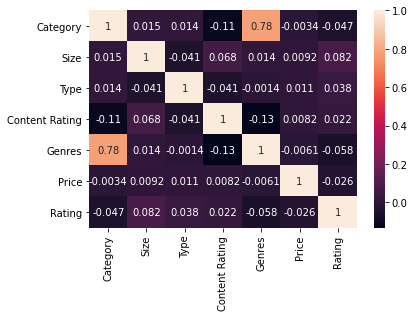

In [15]:
new_frame = clean_df[clean_df.columns[1:]]
correlation_mat = new_frame.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()

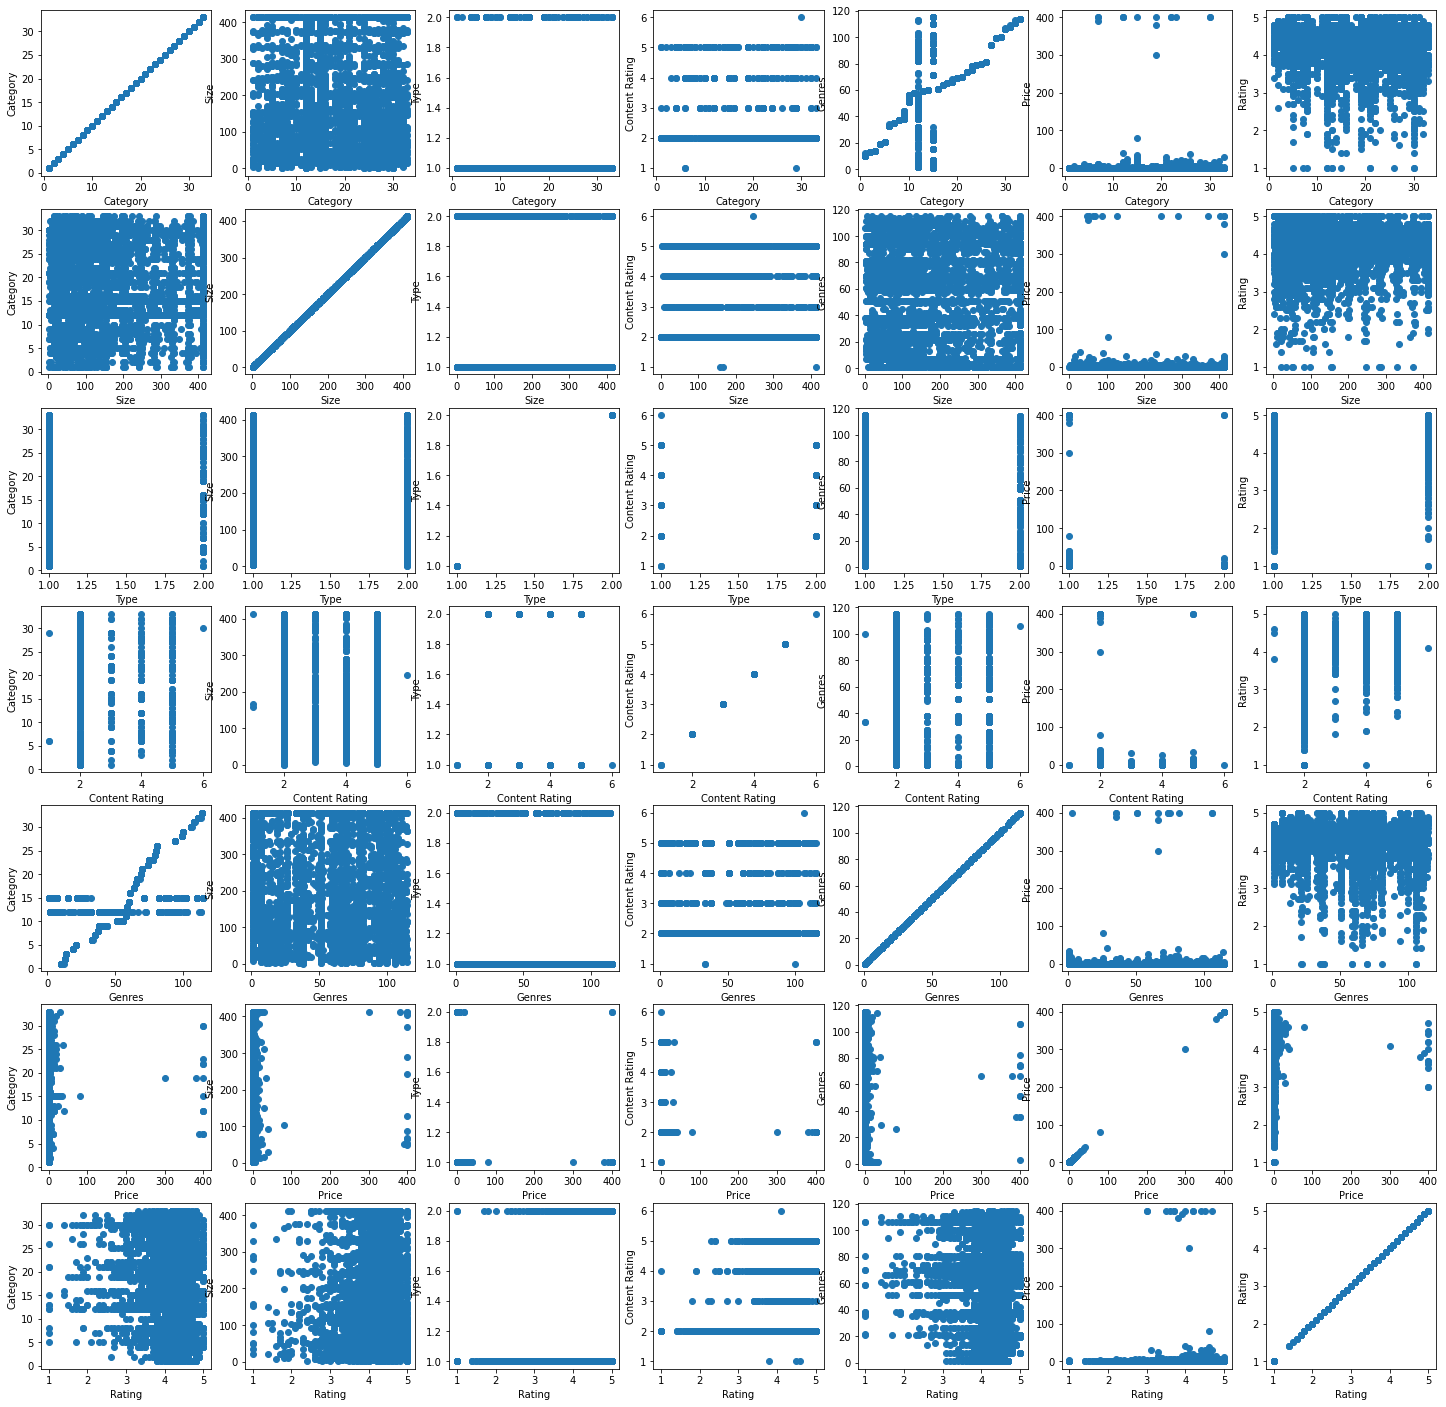

In [16]:
fig, axis = plt.subplots(7, 7, figsize = (25,25))

for ind1, i in enumerate(new_frame.columns):
    for ind2, j in enumerate(new_frame.columns):
        x = new_frame[i]
        y = new_frame[j]
        axis[ind1, ind2].scatter(x,y)
        axis[ind1, ind2].set_xlabel(i)
        axis[ind1, ind2].set_ylabel(j)
plt.show()


In [17]:
for column in clean_df.columns:
    print(colored('Does column {} have NaN ?'.format(column), 'blue'))
    print(colored(df[column].isnull().values.any(), 'green'))


Does column App have NaN ?
False
Does column Category have NaN ?
False
Does column Size have NaN ?
False
Does column Type have NaN ?
False
Does column Content Rating have NaN ?
False
Does column Genres have NaN ?
False
Does column Price have NaN ?
False
Does column Rating have NaN ?
False


In [18]:
print(colored('Columns with finite values return True:', 'green'))
for i in clean_df.columns[1:]:
    print(i,'--------', np.all(np.isfinite(clean_df[i])))

Columns with finite values return True:
Category -------- True
Size -------- True
Type -------- True
Content Rating -------- True
Genres -------- True
Price -------- True
Rating -------- True


## Split Train and Test set

In [19]:
num_train = int(len(clean_df)*0.90)
trainset = clean_df[:num_train]
testset = clean_df[num_train:]

print('Training size is: ', len(trainset))
print('Test size is: ', len(testset))

Training size is:  6639
Test size is:  738


In [20]:
# exclude the column relating to app names which is string type
cluster_df = clean_df[trainset.columns[1:]]
cluster_df.head()

,Category,Size,Type,Content Rating,Genres,Price,Rating
0,1.0,48.0,1.0,2.0,10.0,0.0,4.1
1,1.0,25.0,1.0,2.0,12.0,0.0,3.9
2,1.0,334.0,1.0,2.0,10.0,0.0,4.7
3,1.0,88.0,1.0,5.0,10.0,0.0,4.5
4,1.0,57.0,1.0,2.0,11.0,0.0,4.3


## Clustering + KNN

In [43]:
kmeans = KMeans(n_clusters=20).fit(cluster_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.09230769e+01 2.57125000e+02 1.07371795e+00 2.63461538e+00
  2.41666667e+01 4.55480769e-01 4.27083333e+00]
 [9.78251121e+00 9.17690583e+01 1.08071749e+00 2.60538117e+00
  2.83071749e+01 5.13609865e-01 4.26233184e+00]
 [9.36363636e+00 4.07030303e+02 1.04761905e+00 2.67099567e+00
  2.34805195e+01 5.36320346e-01 4.28203463e+00]
 [2.28759232e+01 1.97887740e+01 1.08419498e+00 2.26440177e+00
  8.24121123e+01 3.32998523e-01 4.20251108e+00]
 [2.74516807e+01 4.08254202e+02 1.03781513e+00 2.71638655e+00
  1.02995798e+02 1.68634454e-01 4.27331933e+00]
 [2.26344464e+01 1.03574692e+02 1.07557118e+00 2.26713533e+00
  8.57047452e+01 3.19050967e-01 4.16608084e+00]
 [2.05974576e+01 3.39012712e+02 1.08050847e+00 2.43644068e+00
  8.30508475e+01 3.41652542e-01 4.20593220e+00]
 [9.21915285e+00 2.84732965e+01 1.06445672e+00 2.53775322e+00
  2.91381215e+01 2.22265193e-01 4.15322284e+00]
 [2.15421941e+01 1.47483122e+02 1.09282700e+00 2.33966245e+00
  8.25590717e+01 3.28312236e-01 4.13101266e+00]
 [2.151636

In [48]:
for i in range (10,20):
    
    kmeans = KMeans(n_clusters=i).fit(cluster_df)
    centroids = kmeans.cluster_centers_
 

    labels = pd.DataFrame(kmeans.labels_) 
    labeledFrame = pd.concat((cluster_df,labels),axis=1)
    labeledFrame = labeledFrame.rename({0:'labels'},axis=1)
    labeledFrame.head()
    
    eval_set =  evaluate(labeledFrame, kmeans, testset, k=1)
    targets , preds = eval_set.pred()
    print("The accuracy for {} clusters and 5 nearest neightber is:".format(i), eval_set.accuracy(targets, preds))

The accuracy for 10 clusters and 5 nearest neightber is: 64.0655
The accuracy for 11 clusters and 5 nearest neightber is: 50.4716
The accuracy for 12 clusters and 5 nearest neightber is: 64.79979999999999
The accuracy for 13 clusters and 5 nearest neightber is: 60.8286
The accuracy for 14 clusters and 5 nearest neightber is: 57.4786
The accuracy for 15 clusters and 5 nearest neightber is: 54.24909999999999
The accuracy for 16 clusters and 5 nearest neightber is: 80.0668
The accuracy for 17 clusters and 5 nearest neightber is: 67.0283
The accuracy for 18 clusters and 5 nearest neightber is: 67.39359999999999
The accuracy for 19 clusters and 5 nearest neightber is: 45.8575
